# Weather Forecast Using  PyOWM
The goal of this notebook is to perform a weather forecast with the library pyown executed by Papermill.<br>
PyOWM is a wrapper for OpenWeatherMap web APIs providing a easier interface to fetch weather data.<br><br>
More information on the links below:<br>
* https://pypi.org/project/pyowm/
* https://pyowm.readthedocs.io/en/latest/usage-examples-v2/weather-api-usage-examples.html



## 1. Accessing pyown API
On the first steps of our analysis we are going to get weather information for the define city using pyown API. <br>
The information is going to be organized on a dictionary, and later loaded as a pandas DataFrame for performing the Data wrangling.

In [31]:
# import libraries
import pyowm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pdfkit 

### 1.1 Setting PyOWM API key and defining variable
This first part of the workflow we define the API key to access OpenWeather service and also the cell to contain the parameter `city` that can be defined using Papermill.

In [32]:
# Set API key
owm = pyowm.OWM('3fb62110b42fec1124c89b9931aed05b')

In [33]:
# Define the default parameters
#city = 'Sao Paulo,BR'
city = 'Madison,US'

### 1.2 Fetching weather information for the defined city
On this part we are going to use PyOWM to fetch data about the city and organized it first on a dictionary, them on a Pandas DataFrame.

In [34]:
# Instantiate forecast object and fetch weather information about city
fc = owm.three_hours_forecast(city)
forecast = fc.get_forecast()

In [35]:
# Create a dictionary to organize the forecast data for the city of interest
dict_forecast = {
    'datetime':[],
    'clouds':[],
    'humidity':[],
    'temp':[],
    'temp_max':[],
    'temp_min':[],
    'detailed_status':[],
    'icon_url':[],
    'rain_vol':[]
}

In [36]:
#Itereate over forecast object acessing the weather features
for weather in forecast:
    dict_forecast['datetime'].append(str(weather.get_reference_time(timeformat='iso')))
    dict_forecast['clouds'].append(weather.get_clouds())
    dict_forecast['humidity'].append(weather.get_humidity())
    dict_forecast['temp'].append(weather.get_temperature(unit='celsius').get('temp'))
    dict_forecast['temp_max'].append(weather.get_temperature(unit='celsius').get('temp_max'))
    dict_forecast['temp_min'].append(weather.get_temperature(unit='celsius').get('temp_min'))
    
    dict_forecast['detailed_status'].append(weather.get_detailed_status())
    dict_forecast['icon_url'].append(weather.get_weather_icon_url())
    if '3h' in weather.get_rain().keys():
        dict_forecast['rain_vol'].append(weather.get_rain().get('3h'))
    else:
        dict_forecast['rain_vol'].append(0)

In [37]:
# Create Dataframe from dictionary
df = pd.DataFrame.from_dict(dict_forecast)

In [38]:
# Set dtype to datetime for 'datetime' column 
df['datetime'] = pd.to_datetime(df['datetime'])

In [39]:
df

,datetime,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
0,2019-12-09 21:00:00+00:00,100,92,-1.19,0.27,-1.19,light snow,http://openweathermap.org/img/w/13d.png,0
1,2019-12-10 00:00:00+00:00,100,76,-5.95,-4.85,-5.95,light snow,http://openweathermap.org/img/w/13n.png,0
2,2019-12-10 03:00:00+00:00,100,74,-7.70,-6.97,-7.70,overcast clouds,http://openweathermap.org/img/w/04n.png,0
3,2019-12-10 06:00:00+00:00,100,71,-8.99,-8.62,-8.99,overcast clouds,http://openweathermap.org/img/w/04n.png,0
4,2019-12-10 09:00:00+00:00,83,68,-11.06,-11.06,-11.06,broken clouds,http://openweathermap.org/img/w/04n.png,0
5,2019-12-10 12:00:00+00:00,47,65,-12.18,-12.18,-12.18,scattered clouds,http://openweathermap.org/img/w/03n.png,0
6,2019-12-10 15:00:00+00:00,0,57,-12.72,-12.72,-12.72,clear sky,http://openweathermap.org/img/w/01d.png,0
7,2019-12-10 18:00:00+00:00,0,35,-10.66,-10.66,-10.66,clear sky,http://openweathermap.org/img/w/01d.png,0
8,2019-12-10 21:00:00+00:00,0,37,-10.33,-10.33,-10.33,clear sky,http://openweathermap.org/img/w/01d.png,0
9,2019-12-11 00:00:00+00:00,0,51,-12.32,-12.32,-12.32,clear sky,http://openweathermap.org/img/w/01n.png,0


### 1.3 Understanding the DataFrame generated from the returned data.
The function `owm.three_hours_forecast(city)` returns us information in 3 hour steps, for the next 5 days, with a total of 40 data points.
We decided to work with the following variables:
* clouds
* humidity
* temp
* temp_max
* temp_min
* detailed_status
* rain_vol

### 1.4 Aggregating data based on the days
On this step we are going to aggregate the data by day to facilitate the understanding and the plotting.

In [40]:
# Create a dataframe agregating the values based on each day
# for mean
df_mean = df.resample('D', on='datetime').mean()
df_mean.index = df_mean.index.date
#df_mean.drop('datetime', axis=1, inplace=True)
df_mean

,clouds,humidity,temp,temp_max,temp_min,rain_vol
2019-12-09,100.000000,92.000000,-1.190000,0.270000,-1.190000,0.0
2019-12-10,53.750000,60.375000,-9.948750,-9.673750,-9.948750,0.0
2019-12-11,23.500000,54.625000,-13.043750,-13.043750,-13.043750,0.0
2019-12-12,73.625000,53.000000,-7.081250,-7.081250,-7.081250,0.0
2019-12-13,99.000000,86.875000,-0.211250,-0.211250,-0.211250,0.0
2019-12-14,99.857143,93.142857,0.182857,0.182857,0.182857,0.0


In [41]:
# for max
df_max = df.resample('D', on='datetime').max()
df_max.index = df_max.index.date
df_max.drop('datetime', axis=1, inplace=True)

df_max

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
2019-12-09,100,92,-1.19,0.27,-1.19,light snow,http://openweathermap.org/img/w/13d.png,0
2019-12-10,100,76,-5.95,-4.85,-5.95,scattered clouds,http://openweathermap.org/img/w/13n.png,0
2019-12-11,99,67,-10.35,-10.35,-10.35,scattered clouds,http://openweathermap.org/img/w/04d.png,0
2019-12-12,100,69,1.44,1.44,1.44,scattered clouds,http://openweathermap.org/img/w/04n.png,0
2019-12-13,100,93,1.75,1.75,1.75,overcast clouds,http://openweathermap.org/img/w/13n.png,0
2019-12-14,100,98,1.21,1.21,1.21,snow,http://openweathermap.org/img/w/13n.png,0


In [42]:
# for min
df_min = df.resample('D', on='datetime').min()
df_min.index = df_min.index.date
df_min.drop('datetime', axis=1, inplace=True)
df_min

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
2019-12-09,100,92,-1.19,0.27,-1.19,light snow,http://openweathermap.org/img/w/13d.png,0
2019-12-10,0,35,-12.72,-12.72,-12.72,broken clouds,http://openweathermap.org/img/w/01d.png,0
2019-12-11,0,38,-15.19,-15.19,-15.19,broken clouds,http://openweathermap.org/img/w/01d.png,0
2019-12-12,0,42,-11.41,-11.41,-11.41,broken clouds,http://openweathermap.org/img/w/01n.png,0
2019-12-13,92,79,-1.55,-1.55,-1.55,light snow,http://openweathermap.org/img/w/04d.png,0
2019-12-14,99,79,-2.03,-2.03,-2.03,light snow,http://openweathermap.org/img/w/04n.png,0


In [43]:
# Create a Dataframe with temperature values (min, max, average) by merging on index
df_temp = df_min[['temp']].merge(df_max[['temp']], 
                                 left_index=True, 
                                 right_index=True, 
                                 suffixes=('_min', '_max')).merge(df_mean[['temp']],
                                                                  left_index=True, 
                                                                  right_index=True)
# Rename columns
df_temp.columns = ['temp_min', 'temp_max', 'temp_mean']
df_temp

,temp_min,temp_max,temp_mean
2019-12-09,-1.19,-1.19,-1.190000
2019-12-10,-12.72,-5.95,-9.948750
2019-12-11,-15.19,-10.35,-13.043750
2019-12-12,-11.41,1.44,-7.081250
2019-12-13,-1.55,1.75,-0.211250
2019-12-14,-2.03,1.21,0.182857


## 2 Creating the visualizations
On this part, we are going to plot the organized data using seaborn.

### 2.1 Temperature plot
Show the forecast for maximun, minimun and average temperature for the next 5 days on the same plots.

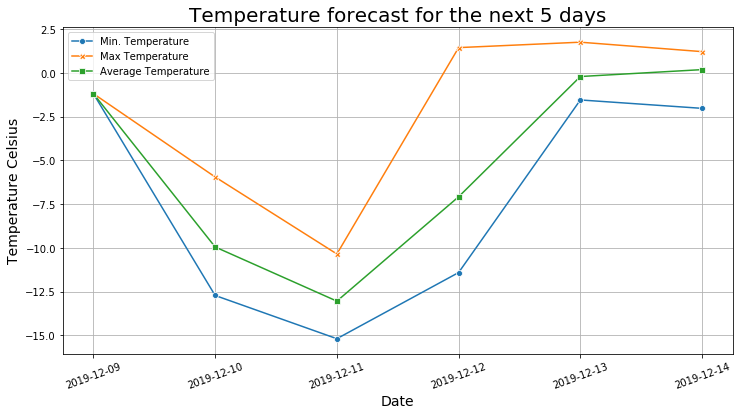

In [44]:
fig = plt.figure()
sns_plot = sns.lineplot(data=df_temp, style="event",markers=True, dashes=False)
sns_plot.set_title(f'Temperature forecast for the next 5 days', fontsize=20)
sns_plot.set_xlabel('Date', fontsize=14)
sns_plot.set_ylabel('Temperature Celsius', fontsize=14)
sns_plot.set_xticklabels(df_temp.index, rotation=20)
sns_plot.grid(True)

sns_plot.legend(labels=['Min. Temperature', 'Max Temperature', 'Average Temperature'])
fig.set_size_inches(12, 6)

temperature_plot = f"{city.split(',')[0].replace(' ','_')}_temperature.png"
sns_plot.figure.savefig(temperature_plot, 
                  dpi=300, facecolor='w', 
                  orientation='portrait',
                  bbox_inches='tight')


### 2.2 Humidity, rain and clouds plot
On this plot we are going to aggregate the data about pluviometry and humidity.

In [45]:
# Create a Dataframe with total expected volume for rain on each day
df_rain_per_day = df.resample('D', on='datetime').sum()[['rain_vol']]
df_rain_per_day.index = df_rain_per_day.index.date
df_rain_per_day

,rain_vol
2019-12-09,0
2019-12-10,0
2019-12-11,0
2019-12-12,0
2019-12-13,0
2019-12-14,0


In [46]:
df_mean

,clouds,humidity,temp,temp_max,temp_min,rain_vol
2019-12-09,100.000000,92.000000,-1.190000,0.270000,-1.190000,0.0
2019-12-10,53.750000,60.375000,-9.948750,-9.673750,-9.948750,0.0
2019-12-11,23.500000,54.625000,-13.043750,-13.043750,-13.043750,0.0
2019-12-12,73.625000,53.000000,-7.081250,-7.081250,-7.081250,0.0
2019-12-13,99.000000,86.875000,-0.211250,-0.211250,-0.211250,0.0
2019-12-14,99.857143,93.142857,0.182857,0.182857,0.182857,0.0


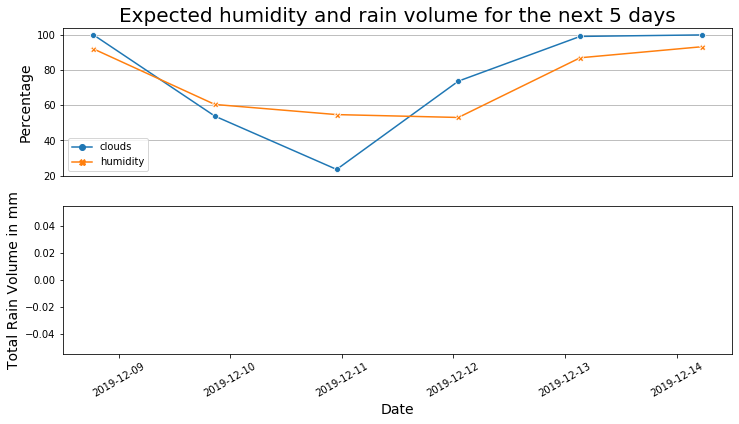

In [47]:
fig = plt.figure()
# Lineplot for humidity and clouds
ax1 = fig.add_subplot(211)
ax1 = sns.lineplot(data=df_mean[['clouds', 'humidity']], markers=True, dashes=False)
ax1.set_xticks([])
ax1.set_title(f'Expected humidity and rain volume for the next 5 days', fontsize=20)
ax1.set_ylabel('Percentage', fontsize=14)
ax1.grid(True)

# Barplot for total rain per day
ax2 = fig.add_subplot(212)
ax2 = sns.barplot(x=df_rain_per_day.index, y='rain_vol', 
                  data=df_rain_per_day,
                  palette="Blues_d")
ax2.set_xticklabels(df_temp.index, rotation=30)
ax2.set_ylabel('Total Rain Volume in mm', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
fig.set_size_inches(12, 6)

rain_humidity_plot = f"{city.split(',')[0].replace(' ','_')}_rain_humidity.png"
fig.savefig(rain_humidity_plot, 
              dpi=300, facecolor='w', 
              orientation='portrait',
              bbox_inches='tight')


### 3 Creating the weather report

On this part of the workflow we are going to use a simple HTML template to create our final report, adding information about the city chosen and the plots generated above.

In [48]:
# Missing variables for the report

In [49]:
# Defining start and end date for the analysis
today = str(df_mean.index.min()).replace('-', '/')
last_day = str(df_mean.index.max()).replace('-', '/')

In [50]:
# HTML template to add our data and plots
report_template = f'''
<!DOCTYPE html>
    <html>
      <head>
        <meta charset='utf-8'>
        <title>Weather Forecast with PyOWM</title>
        <link rel='stylesheet' href='report.css'>
          <style>
          h1 {{
          font-family: Arial;
          font-size: 300%;
          }}
          h2 {{
          font-family: Arial;
          font-size: 200%;
          }}
          @page {{
          size: 7in 9.25in;
          margin: 27mm 16mm 27mm 16mm;
          }}
          </style>                       
      </head>
      <h1 align="center">Weather forecast for {city}</h1>
      <h2 align="center">Initial date: {today}</h2>
      <h2 align="center">Final date: {last_day}</h2>
        
      <figure>
        <img src="{temperature_plot}" width="1200" height="600">
      </figure>
      <figure>
        <img src="{rain_humidity_plot}" width="1200" height="600">
      </figure>      
    </html>
'''

In [51]:
# Save HTML string to file
html_report = f"{city.split(',')[0].replace(' ','_')}_report.html"
with open(html_report, "w") as r:
    r.write(report_template)

In [52]:
# Use pdfkit to create the pdf report from the 
pdfkit.from_file(html_report, f"{city.split(',')[0].replace(' ', '_')}_weather_report_for.pdf") 

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


True